#  Importing libraries and datasets

In [2]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing encoder
from sklearn.preprocessing import LabelEncoder

# Importing model validation
from sklearn.model_selection import train_test_split

# Importing Regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Display max columns
pd.set_option('display.max_columns', None)


In [3]:
flight_data = pd.read_csv("C:/Users/prita/OneDrive/Documents/Ancillary Revenue Prediction/data/data_flight_20k.csv")
sales_data = pd.read_csv("C:/Users/prita/OneDrive/Documents/Ancillary Revenue Prediction/data/data_sales_20k.csv")
validation_data = pd.read_csv("C:/Users/prita/OneDrive/Documents/Ancillary Revenue Prediction/data/validation_set.csv")

In [4]:
flight_data

,InventoryLegSK,CarrierCode,FlightNumber,DepartureAirport,ArrivalAirport,DepartureDateTimeLocal,DepartureDateTimeUTC,ArrivalDateTimeLocal,ArrivalDateTimeUTC,ArrivalCountry,DepartureCountry,RouteGroup,Region,FlightCapacity,FlightStatus
0,9153888,FR,144,BER,STN,15/06/2022 06:30,15/06/2022 04:30,15/06/2022 07:20,15/06/2022 06:20,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed
1,9857561,FR,6833,EIN,NAP,28/07/2022 12:20,28/07/2022 10:20,28/07/2022 14:35,28/07/2022 12:35,Italy,Netherlands,LEISURE,BENLFR LEISURE,189,Departed
2,9527383,FR,8973,BRI,CTA,24/04/2022 19:25,24/04/2022 17:25,24/04/2022 20:35,24/04/2022 18:35,Italy,Italy,DOMESTIC,IT DOM,189,Cancelled
3,9118423,FR,1025,DUB,BUD,12/09/2022 13:25,12/09/2022 12:25,12/09/2022 17:15,12/09/2022 15:15,Hungary,Ireland,CITY,IE CITY,189,Cancelled
4,9897668,FR,4150,PMI,HHN,03/07/2022 19:15,03/07/2022 17:15,03/07/2022 21:30,03/07/2022 19:30,Germany,Spain,LEISURE,DE LEISURE,189,Departed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9500351,FR,1485,PSA,PMI,27/05/2022 10:35,27/05/2022 08:35,27/05/2022 12:10,27/05/2022 10:10,Spain,Italy,LEISURE,S EUR LEISURE,189,Cancelled
19996,10129803,FR,4106,GDN,WRO,26/09/2022 16:55,26/09/2022 14:55,26/09/2022 18:00,26/09/2022 16:00,Poland,Poland,DOMESTIC,OTHER DOM,189,Departed
19997,9207549,FR,4916,PMO,TRN,25/04/2022 06:25,25/04/2022 04:25,25/04/2022 08:05,25/04/2022 06:05,Italy,Italy,DOMESTIC,IT DOM,189,Departed
19998,9573360,FR,9132,CIA,OPO,24/08/2022 10:25,24/08/2022 08:25,24/08/2022 12:20,24/08/2022 11:20,Portugal,Italy,CITY,ESPT-IT,189,Cancelled


In [5]:
sales_data

,Unnamed: 0,InventoryLegSK,PurchaseDateSK,Passenger_UnitsSold,Priority_Boarding_UnitsSold,Priority_Boarding_RevenueEUR,20KG_Bag_UnitsSold,20KG_Bag_RevenueEUR,10KG_Bag_UnitsSold,10KG_Bag_RevenueEUR
0,0,8916784,20200120.0,4,0.0,"0,0",0.0,0.00,0.0,0.00
1,1,8916784,20200716.0,0,0.0,"0,0",0.0,0.00,0.0,0.00
2,2,8916784,20200728.0,5,0.0,"0,0",0.0,0.00,0.0,0.00
3,3,8916784,20200814.0,2,0.0,"0,0",0.0,0.00,0.0,0.00
4,4,8916784,20210116.0,3,0.0,"0,0",0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
990563,990563,10857429,20220916.0,0,0.0,"0,0",1.0,36.35,0.0,0.00
990564,990564,10857429,20220917.0,0,3.0,"65,0",0.0,0.00,5.0,155.88
990565,990565,10857429,20220918.0,0,0.0,"0,0",1.0,36.35,0.0,0.00
990566,990566,10857429,20220919.0,0,0.0,"0,0",0.0,0.00,0.0,0.00


In [6]:
validation_data

,InventoryLegSK,CarrierCode,FlightNumber,DepartureAirport,ArrivalAirport,DepartureDateTimeLocal,DepartureDateTimeUTC,ArrivalDateTimeLocal,ArrivalDateTimeUTC,ArrivalCountry,DepartureCountry,RouteGroup,Region,FlightCapacity
0,8916818,FR,9898,LPL,ALC,30/04/2023 10:10,30/04/2023 09:10,30/04/2023 13:55,30/04/2023 11:55,Spain,United Kingdom,LEISURE,UK REG LEISURE,189
1,8917570,FR,9094,MAN,ALC,30/04/2023 10:10,30/04/2023 09:10,30/04/2023 13:55,30/04/2023 11:55,Spain,United Kingdom,LEISURE,UK REG LEISURE,189
2,8917600,FR,8296,BRS,ALC,30/04/2023 10:10,30/04/2023 09:10,30/04/2023 13:55,30/04/2023 11:55,Spain,United Kingdom,LEISURE,UK REG LEISURE,189
3,8917836,FR,7544,MAN,BCN,30/04/2023 10:10,30/04/2023 09:10,30/04/2023 13:55,30/04/2023 11:55,Spain,United Kingdom,LEISURE,UK REG LEISURE,189
4,8918208,FR,9898,LPL,ALC,30/04/2023 10:10,30/04/2023 09:10,30/04/2023 13:55,30/04/2023 11:55,Spain,United Kingdom,LEISURE,UK REG LEISURE,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,9744821,FR,4929,FCO,CTA,11/07/2023 05:45,11/07/2023 04:45,11/07/2023 09:45,11/07/2023 07:45,Italy,Italy,DOMESTIC,ROM DOM,189
1920,9745290,FR,4930,CTA,FCO,11/07/2023 05:45,11/07/2023 04:45,11/07/2023 09:45,11/07/2023 07:45,Italy,Italy,DOMESTIC,ROM DOM,189
1921,9746110,FR,4929,FCO,CTA,11/07/2023 05:45,11/07/2023 04:45,11/07/2023 09:45,11/07/2023 07:45,Italy,Italy,DOMESTIC,ROM DOM,189
1922,9857976,FR,488,VIE,PMI,11/07/2023 05:45,11/07/2023 04:45,11/07/2023 09:45,11/07/2023 07:45,Spain,Austria,LEISURE,DE LEISURE,180


#  Data Exploration, Cleaning, and Analysis (EDA)





In [8]:
# Merging flight and sales data

ancillary_revenue = pd.merge(flight_data, sales_data, on = 'InventoryLegSK', how = 'inner')
ancillary_revenue

,InventoryLegSK,CarrierCode,FlightNumber,DepartureAirport,ArrivalAirport,DepartureDateTimeLocal,DepartureDateTimeUTC,ArrivalDateTimeLocal,ArrivalDateTimeUTC,ArrivalCountry,DepartureCountry,RouteGroup,Region,FlightCapacity,FlightStatus,Unnamed: 0,PurchaseDateSK,Passenger_UnitsSold,Priority_Boarding_UnitsSold,Priority_Boarding_RevenueEUR,20KG_Bag_UnitsSold,20KG_Bag_RevenueEUR,10KG_Bag_UnitsSold,10KG_Bag_RevenueEUR
0,9153888,FR,144,BER,STN,15/06/2022 06:30,15/06/2022 04:30,15/06/2022 07:20,15/06/2022 06:20,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309271,20220107.0,1,0.0,"0,0",0.0,0.00,0.0,0.00
1,9153888,FR,144,BER,STN,15/06/2022 06:30,15/06/2022 04:30,15/06/2022 07:20,15/06/2022 06:20,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309272,20220213.0,0,0.0,"0,0",0.0,0.00,0.0,0.00
2,9153888,FR,144,BER,STN,15/06/2022 06:30,15/06/2022 04:30,15/06/2022 07:20,15/06/2022 06:20,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309273,20220217.0,4,0.0,"0,0",1.0,22.57,0.0,0.00
3,9153888,FR,144,BER,STN,15/06/2022 06:30,15/06/2022 04:30,15/06/2022 07:20,15/06/2022 06:20,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309274,20220407.0,3,1.0,"6,0",0.0,0.00,0.0,0.00
4,9153888,FR,144,BER,STN,15/06/2022 06:30,15/06/2022 04:30,15/06/2022 07:20,15/06/2022 06:20,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309275,20220408.0,2,2.0,"12,0",0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990563,9400373,FR,5269,EIN,SVQ,01/07/2022 09:40,01/07/2022 07:40,01/07/2022 12:30,01/07/2022 10:30,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410432,20220628.0,7,0.0,"0,0",0.0,0.00,4.0,125.99
990564,9400373,FR,5269,EIN,SVQ,01/07/2022 09:40,01/07/2022 07:40,01/07/2022 12:30,01/07/2022 10:30,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410433,20220629.0,1,0.0,"0,0",0.0,0.00,0.0,0.00
990565,9400373,FR,5269,EIN,SVQ,01/07/2022 09:40,01/07/2022 07:40,01/07/2022 12:30,01/07/2022 10:30,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410434,20220630.0,0,0.0,"0,0",1.0,59.99,3.0,107.97
990566,9400373,FR,5269,EIN,SVQ,01/07/2022 09:40,01/07/2022 07:40,01/07/2022 12:30,01/07/2022 10:30,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410435,20220701.0,0,0.0,"0,0",0.0,0.00,0.0,0.00


In [9]:
# Viewing duplicate fields

ancillary_revenue.duplicated().sum()

0

In [10]:
validation_data.duplicated().sum()

0

### Null Values

In [12]:
# Viewing nulls in percentage

(ancillary_revenue.isnull().sum()/len(ancillary_revenue))*100

InventoryLegSK                  0.000000
CarrierCode                     0.000000
FlightNumber                    0.000000
DepartureAirport                0.000000
ArrivalAirport                  0.000000
DepartureDateTimeLocal          0.000000
DepartureDateTimeUTC            0.000000
ArrivalDateTimeLocal            0.000000
ArrivalDateTimeUTC              0.000000
ArrivalCountry                  0.000000
DepartureCountry                0.000000
RouteGroup                      0.000000
Region                          0.000000
FlightCapacity                  0.000000
FlightStatus                    0.526567
Unnamed: 0                      0.000000
PurchaseDateSK                  0.401285
Passenger_UnitsSold             0.000000
Priority_Boarding_UnitsSold     0.326580
Priority_Boarding_RevenueEUR    0.326580
20KG_Bag_UnitsSold              0.996802
20KG_Bag_RevenueEUR             0.996802
10KG_Bag_UnitsSold              0.030084
10KG_Bag_RevenueEUR             0.030084
dtype: float64

In [13]:
validation_data.isnull().sum()/len(validation_data)*100

InventoryLegSK            0.0
CarrierCode               0.0
FlightNumber              0.0
DepartureAirport          0.0
ArrivalAirport            0.0
DepartureDateTimeLocal    0.0
DepartureDateTimeUTC      0.0
ArrivalDateTimeLocal      0.0
ArrivalDateTimeUTC        0.0
ArrivalCountry            0.0
DepartureCountry          0.0
RouteGroup                0.0
Region                    0.0
FlightCapacity            0.0
dtype: float64

In [14]:
# Fixing null fields by filling mode or mean

# Filling nulls by mode for object
ancillary_revenue['FlightStatus'] = ancillary_revenue['FlightStatus'].fillna(ancillary_revenue['FlightStatus'].mode().values[0])
# ancillary_revenue['Priority_Boarding_RevenueEUR'] = ancillary_revenue['Priority_Boarding_RevenueEUR'].fillna(ancillary_revenue['Priority_Boarding_RevenueEUR'].mode().values[0])

# Filling nulls by mean for numeric
ancillary_revenue['Priority_Boarding_UnitsSold'] = ancillary_revenue['Priority_Boarding_UnitsSold'].fillna(0)
ancillary_revenue['20KG_Bag_UnitsSold'] = ancillary_revenue['20KG_Bag_UnitsSold'].fillna(0)
ancillary_revenue['20KG_Bag_RevenueEUR'] = ancillary_revenue['20KG_Bag_RevenueEUR'].fillna(0)
ancillary_revenue['10KG_Bag_UnitsSold'] = ancillary_revenue['10KG_Bag_UnitsSold'].fillna(0)
ancillary_revenue['10KG_Bag_RevenueEUR'] = ancillary_revenue['10KG_Bag_RevenueEUR'].fillna(0)

# Filling nulls by median for columns that have datetime data
ancillary_revenue['PurchaseDateSK'] = ancillary_revenue['PurchaseDateSK'].fillna(ancillary_revenue['PurchaseDateSK'].median())
# Note: PurchaseDateSK is a float, however, as it represents date, we have taken median and not mean.

In [15]:
# Verifying nulls in percentage after fixing

(ancillary_revenue.isnull().sum()/len(ancillary_revenue))*100

InventoryLegSK                  0.00000
CarrierCode                     0.00000
FlightNumber                    0.00000
DepartureAirport                0.00000
ArrivalAirport                  0.00000
DepartureDateTimeLocal          0.00000
DepartureDateTimeUTC            0.00000
ArrivalDateTimeLocal            0.00000
ArrivalDateTimeUTC              0.00000
ArrivalCountry                  0.00000
DepartureCountry                0.00000
RouteGroup                      0.00000
Region                          0.00000
FlightCapacity                  0.00000
FlightStatus                    0.00000
Unnamed: 0                      0.00000
PurchaseDateSK                  0.00000
Passenger_UnitsSold             0.00000
Priority_Boarding_UnitsSold     0.00000
Priority_Boarding_RevenueEUR    0.32658
20KG_Bag_UnitsSold              0.00000
20KG_Bag_RevenueEUR             0.00000
10KG_Bag_UnitsSold              0.00000
10KG_Bag_RevenueEUR             0.00000
dtype: float64

### Data Types

In [17]:
# Viewing data types

ancillary_revenue.dtypes

InventoryLegSK                    int64
CarrierCode                      object
FlightNumber                      int64
DepartureAirport                 object
ArrivalAirport                   object
DepartureDateTimeLocal           object
DepartureDateTimeUTC             object
ArrivalDateTimeLocal             object
ArrivalDateTimeUTC               object
ArrivalCountry                   object
DepartureCountry                 object
RouteGroup                       object
Region                           object
FlightCapacity                    int64
FlightStatus                     object
Unnamed: 0                        int64
PurchaseDateSK                  float64
Passenger_UnitsSold               int64
Priority_Boarding_UnitsSold     float64
Priority_Boarding_RevenueEUR     object
20KG_Bag_UnitsSold              float64
20KG_Bag_RevenueEUR             float64
10KG_Bag_UnitsSold              float64
10KG_Bag_RevenueEUR             float64
dtype: object

In [18]:
# Converting data types

# For datetime columns
ancillary_revenue['DepartureDateTimeLocal'] = pd.to_datetime(ancillary_revenue['DepartureDateTimeLocal'], format='%d/%m/%Y %H:%M')
ancillary_revenue['DepartureDateTimeUTC'] = pd.to_datetime(ancillary_revenue['DepartureDateTimeUTC'], format='%d/%m/%Y %H:%M')
ancillary_revenue['ArrivalDateTimeLocal'] = pd.to_datetime(ancillary_revenue['ArrivalDateTimeLocal'], format='%d/%m/%Y %H:%M')
ancillary_revenue['ArrivalDateTimeUTC'] = pd.to_datetime(ancillary_revenue['ArrivalDateTimeUTC'], format='%d/%m/%Y %H:%M')

# For other columns
ancillary_revenue['Priority_Boarding_RevenueEUR'] = ancillary_revenue['Priority_Boarding_RevenueEUR'].replace('0,0', np.nan)
ancillary_revenue['Priority_Boarding_RevenueEUR'] = pd.to_numeric(ancillary_revenue['Priority_Boarding_RevenueEUR'].str.replace(',', ''), errors='coerce')

# Filling nulls in Priority Boarding Revenue by 0:
ancillary_revenue['Priority_Boarding_RevenueEUR'] = ancillary_revenue['Priority_Boarding_RevenueEUR'].fillna(0)

In [19]:
validation_data.dtypes

InventoryLegSK             int64
CarrierCode               object
FlightNumber               int64
DepartureAirport          object
ArrivalAirport            object
DepartureDateTimeLocal    object
DepartureDateTimeUTC      object
ArrivalDateTimeLocal      object
ArrivalDateTimeUTC        object
ArrivalCountry            object
DepartureCountry          object
RouteGroup                object
Region                    object
FlightCapacity             int64
dtype: object

In [20]:
# Converting data types in validation set

validation_data['DepartureDateTimeLocal'] = pd.to_datetime(validation_data['DepartureDateTimeLocal'], format='%d/%m/%Y %H:%M')
validation_data['DepartureDateTimeUTC'] = pd.to_datetime(validation_data['DepartureDateTimeUTC'], format='%d/%m/%Y %H:%M')
validation_data['ArrivalDateTimeLocal'] = pd.to_datetime(validation_data['ArrivalDateTimeLocal'], format='%d/%m/%Y %H:%M')
validation_data['ArrivalDateTimeUTC'] = pd.to_datetime(validation_data['ArrivalDateTimeUTC'], format='%d/%m/%Y %H:%M')

In [21]:
ancillary_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990568 entries, 0 to 990567
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InventoryLegSK                990568 non-null  int64         
 1   CarrierCode                   990568 non-null  object        
 2   FlightNumber                  990568 non-null  int64         
 3   DepartureAirport              990568 non-null  object        
 4   ArrivalAirport                990568 non-null  object        
 5   DepartureDateTimeLocal        990568 non-null  datetime64[ns]
 6   DepartureDateTimeUTC          990568 non-null  datetime64[ns]
 7   ArrivalDateTimeLocal          990568 non-null  datetime64[ns]
 8   ArrivalDateTimeUTC            990568 non-null  datetime64[ns]
 9   ArrivalCountry                990568 non-null  object        
 10  DepartureCountry              990568 non-null  object        
 11  RouteGroup   

In [22]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   InventoryLegSK          1924 non-null   int64         
 1   CarrierCode             1924 non-null   object        
 2   FlightNumber            1924 non-null   int64         
 3   DepartureAirport        1924 non-null   object        
 4   ArrivalAirport          1924 non-null   object        
 5   DepartureDateTimeLocal  1924 non-null   datetime64[ns]
 6   DepartureDateTimeUTC    1924 non-null   datetime64[ns]
 7   ArrivalDateTimeLocal    1924 non-null   datetime64[ns]
 8   ArrivalDateTimeUTC      1924 non-null   datetime64[ns]
 9   ArrivalCountry          1924 non-null   object        
 10  DepartureCountry        1924 non-null   object        
 11  RouteGroup              1924 non-null   object        
 12  Region                  1924 non-null   object  

#### Data Exploration



In [24]:
# Cleaning PurchaseDateSK column

ancillary_revenue['PurchaseDateSK'] = ancillary_revenue['PurchaseDateSK'].astype(str).str.replace('.0', '', regex=False)
ancillary_revenue['PurchaseDateSK'] = pd.to_datetime(ancillary_revenue['PurchaseDateSK'], format='%Y%m%d', errors='coerce')


In [25]:
ancillary_revenue['CarrierCode'].value_counts(ascending = False)

CarrierCode
FR    977385
RK     13055
RR       128
Name: count, dtype: int64

In [26]:
ancillary_revenue['CarrierCode'].value_counts(ascending = False)

CarrierCode
FR    977385
RK     13055
RR       128
Name: count, dtype: int64

In [27]:
ancillary_revenue['DepartureAirport'].value_counts(ascending = False)

DepartureAirport
STN    66177
BGY    43622
PMI    37374
DUB    32937
BCN    26627
       ...  
ODS       31
LPP       29
SEN       13
BES        7
HRK        3
Name: count, Length: 216, dtype: int64

In [28]:
ancillary_revenue['DepartureAirport'].unique()

array(['BER', 'EIN', 'BRI', 'DUB', 'PMI', 'KBP', 'BCN', 'MAD', 'TSF',
       'LPL', 'FCO', 'BGY', 'MLA', 'MAN', 'ZAD', 'LBA', 'OPO', 'NTE',
       'BLQ', 'VLC', 'PSA', 'CRL', 'TPS', 'NCL', 'BOD', 'SCQ', 'KUN',
       'FAO', 'MRS', 'SVQ', 'CGN', 'WMI', 'PRG', 'VNO', 'BHX', 'WRO',
       'TFN', 'CTA', 'BDS', 'CIA', 'BRU', 'SKG', 'BTS', 'BUD', 'HRK',
       'ORK', 'KRK', 'KGS', 'AGP', 'EDI', 'STN', 'LIS', 'LPA', 'PFO',
       'MXP', 'VIE', 'GOA', 'BLL', 'PMO', 'NUE', 'ZAG', 'IBZ', 'TLV',
       'REU', 'FRA', 'BVA', 'AHO', 'ATH', 'VCE', 'FKB', 'CPH', 'KIR',
       'KLX', 'NAP', 'HHN', 'RHO', 'LUX', 'FMM', 'ALC', 'SZZ', 'RIX',
       'MAH', 'CDT', 'EXT', 'ZAZ', 'CHQ', 'LWO', 'SUF', 'GOT', 'GDN',
       'GRO', 'TFS', 'SCV', 'CAG', 'RMU', 'PSR', 'OTP', 'NCE', 'SOF',
       'CIY', 'KTW', 'BIQ', 'TRN', 'CCF', 'VBY', 'BRS', 'LRH', 'FNC',
       'ARN', 'VRN', 'TRS', 'JTR', 'PUY', 'PIK', 'AMM', 'NRN', 'TLS',
       'ACE', 'BOH', 'HER', 'RBA', 'PDL', 'SNN', 'CFU', 'HAM', 'BZR',
       'SEN', 'DLM',

In [29]:
ancillary_revenue['ArrivalAirport'].value_counts(ascending = False)

ArrivalAirport
STN    62169
BGY    39161
PMI    35113
DUB    33370
BCN    29642
       ...  
ODS       13
BES       13
SEN        5
HRK        4
LEJ        1
Name: count, Length: 217, dtype: int64

In [30]:
ancillary_revenue['ArrivalAirport'].unique()

array(['STN', 'NAP', 'CTA', 'BUD', 'HHN', 'BLQ', 'HAM', 'CIA', 'BRS',
       'CPH', 'SOF', 'MAH', 'TSF', 'ZAD', 'HEL', 'GRO', 'SUF', 'CFE',
       'DUB', 'AHO', 'BGY', 'WMI', 'PSA', 'IBZ', 'BER', 'BLL', 'FMM',
       'ARN', 'EMA', 'LIL', 'AGP', 'LTN', 'MAD', 'BCN', 'MAN', 'GDN',
       'ALC', 'FCO', 'PMO', 'CGN', 'BOJ', 'NRN', 'PMI', 'BVA', 'REU',
       'CAG', 'EIN', 'FKB', 'EDI', 'FAO', 'OPO', 'VLC', 'LIS', 'MRS',
       'VIE', 'PSR', 'VGO', 'ORK', 'CRL', 'MXP', 'TRS', 'EFL', 'BRI',
       'OTP', 'BZR', 'VRN', 'PVK', 'INI', 'KTW', 'BDS', 'NCL', 'LPL',
       'KLX', 'NUE', 'CFU', 'SCQ', 'BTS', 'BRU', 'CUF', 'LPA', 'TRF',
       'RHO', 'PRG', 'TGD', 'PFO', 'SKG', 'CHQ', 'NOC', 'SVQ', 'HER',
       'ATH', 'VCE', 'TRN', 'ZTH', 'TLS', 'FMO', 'CIY', 'VIT', 'POZ',
       'WRO', 'MLA', 'TPS', 'KGS', 'BHX', 'ACE', 'KRK', 'CCF', 'LBA',
       'LUX', 'SFT', 'SDR', 'FNC', 'SBZ', 'PUY', 'LRH', 'SPC', 'FRA',
       'TFN', 'EGC', 'BOD', 'BOH', 'ODS', 'HAU', 'TLV', 'FEZ', 'VST',
       'KUN', 'KIR',

In [31]:
ancillary_revenue['ArrivalCountry'].unique()

array(['United Kingdom', 'Italy', 'Hungary', 'Germany', 'Denmark',
       'Bulgaria', 'Spain', 'Croatia', 'Finland', 'France', 'Ireland',
       'Poland', 'Sweden', 'Netherlands', 'Portugal', 'Austria',
       'Belgium', 'Greece', 'Romania', 'Serbia', 'Slovakia', 'Norway',
       'Czech Republic', 'Montenegro', 'Cyprus', 'Malta', 'Luxembourg',
       'Ukraine', 'Israel', 'Morocco', 'Lithuania', 'Jordan', 'Latvia',
       'Bosnia and Herzegovina', 'Estonia', 'Turkey', 'Switzerland'],
      dtype=object)

In [32]:
ancillary_revenue['DepartureCountry'].unique()

array(['Germany', 'Netherlands', 'Italy', 'Ireland', 'Spain', 'Ukraine',
       'United Kingdom', 'Malta', 'Croatia', 'Portugal', 'France',
       'Belgium', 'Lithuania', 'Poland', 'Czech Republic', 'Greece',
       'Slovakia', 'Hungary', 'Cyprus', 'Austria', 'Denmark', 'Israel',
       'Luxembourg', 'Latvia', 'Sweden', 'Romania', 'Bulgaria', 'Jordan',
       'Morocco', 'Turkey', 'Norway', 'Estonia', 'Finland',
       'Bosnia and Herzegovina', 'Switzerland', 'Montenegro', 'Serbia'],
      dtype=object)

In [33]:
ancillary_revenue['RouteGroup'].unique()

array(['CITY', 'LEISURE', 'DOMESTIC'], dtype=object)

In [34]:
ancillary_revenue['Region'].value_counts(ascending = False)

Region
IT DOM              70321
UK REG LEISURE      66641
LON CITY MULTI      65155
DE LEISURE          61449
EAST-ESFRIT         58545
CE EUR LEISURE      55352
BENLFR LEISURE      50381
S EUR LEISURE       49367
ESPT-IT             49243
MIL DOM             41393
IE LEISURE          38376
LON CITY            36534
IE CITY             36443
LON LEISURE         33438
ESPT DOM            28659
UK REG CITY         25550
BCNMAD DOM          23248
BENL-FRIT           22772
ESPT-FR             19563
ROM DOM             18517
OTHER DOM           16282
ES CANARY           15250
SCOT LEISURE        15093
BENL-ESPT           14740
DE-FRITIE           13479
SCAN LEISURE        12924
GREECE EURO CITY    12616
FR-IT               11811
SCAN-ESIT           11537
DE-ESPT              8992
SCAN N EUR           6415
UK DOM                482
Name: count, dtype: int64

In [35]:
ancillary_revenue['FlightCapacity'].value_counts(ascending = False)

FlightCapacity
189    809310
197    130263
180     50993
148         2
Name: count, dtype: int64

In [36]:
ancillary_revenue['FlightStatus'].value_counts(ascending = False)

FlightStatus
Departed     984324
Cancelled      6244
Name: count, dtype: int64

#  Feature Engineering

In [38]:
# Creating a new column 'Ancillary_Revenue' for total ancillary revenue for each flight

ancillary_revenue['Ancillary_Revenue'] = (ancillary_revenue['Priority_Boarding_RevenueEUR'] + ancillary_revenue['20KG_Bag_RevenueEUR'] + ancillary_revenue['10KG_Bag_RevenueEUR'])
ancillary_revenue

,InventoryLegSK,CarrierCode,FlightNumber,DepartureAirport,ArrivalAirport,DepartureDateTimeLocal,DepartureDateTimeUTC,ArrivalDateTimeLocal,ArrivalDateTimeUTC,ArrivalCountry,DepartureCountry,RouteGroup,Region,FlightCapacity,FlightStatus,Unnamed: 0,PurchaseDateSK,Passenger_UnitsSold,Priority_Boarding_UnitsSold,Priority_Boarding_RevenueEUR,20KG_Bag_UnitsSold,20KG_Bag_RevenueEUR,10KG_Bag_UnitsSold,10KG_Bag_RevenueEUR,Ancillary_Revenue
0,9153888,FR,144,BER,STN,2022-06-15 06:30:00,2022-06-15 04:30:00,2022-06-15 07:20:00,2022-06-15 06:20:00,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309271,2022-01-07,1,0.0,0.0,0.0,0.00,0.0,0.00,0.00
1,9153888,FR,144,BER,STN,2022-06-15 06:30:00,2022-06-15 04:30:00,2022-06-15 07:20:00,2022-06-15 06:20:00,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309272,2022-02-13,0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
2,9153888,FR,144,BER,STN,2022-06-15 06:30:00,2022-06-15 04:30:00,2022-06-15 07:20:00,2022-06-15 06:20:00,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309273,2022-02-17,4,0.0,0.0,1.0,22.57,0.0,0.00,22.57
3,9153888,FR,144,BER,STN,2022-06-15 06:30:00,2022-06-15 04:30:00,2022-06-15 07:20:00,2022-06-15 06:20:00,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309274,2022-04-07,3,1.0,60.0,0.0,0.00,0.0,0.00,60.00
4,9153888,FR,144,BER,STN,2022-06-15 06:30:00,2022-06-15 04:30:00,2022-06-15 07:20:00,2022-06-15 06:20:00,United Kingdom,Germany,CITY,LON CITY MULTI,189,Departed,309275,2022-04-08,2,2.0,120.0,0.0,0.00,0.0,0.00,120.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990563,9400373,FR,5269,EIN,SVQ,2022-07-01 09:40:00,2022-07-01 07:40:00,2022-07-01 12:30:00,2022-07-01 10:30:00,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410432,2022-06-28,7,0.0,0.0,0.0,0.00,4.0,125.99,125.99
990564,9400373,FR,5269,EIN,SVQ,2022-07-01 09:40:00,2022-07-01 07:40:00,2022-07-01 12:30:00,2022-07-01 10:30:00,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410433,2022-06-29,1,0.0,0.0,0.0,0.00,0.0,0.00,0.00
990565,9400373,FR,5269,EIN,SVQ,2022-07-01 09:40:00,2022-07-01 07:40:00,2022-07-01 12:30:00,2022-07-01 10:30:00,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410434,2022-06-30,0,0.0,0.0,1.0,59.99,3.0,107.97,167.96
990566,9400373,FR,5269,EIN,SVQ,2022-07-01 09:40:00,2022-07-01 07:40:00,2022-07-01 12:30:00,2022-07-01 10:30:00,Spain,Netherlands,CITY,BENL-ESPT,189,Departed,410435,2022-07-01,0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [39]:
# Dropping unnamed

ancillary_revenue.drop('Unnamed: 0', axis = 1, inplace = True)

### Detecting Outliers

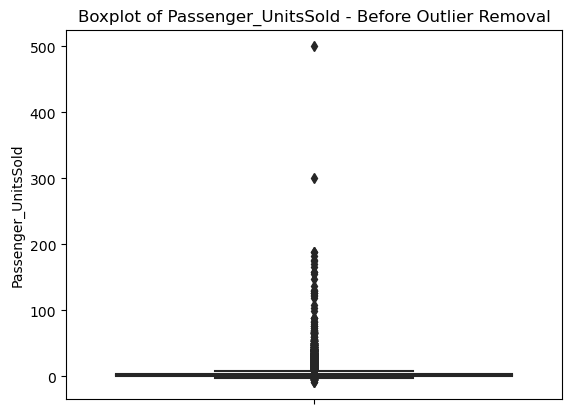

In [41]:
# Boxplot of Passenger_UnitsSold

sns.boxplot(y = 'Passenger_UnitsSold', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of Passenger_UnitsSold - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('Passenger_UnitsSold');

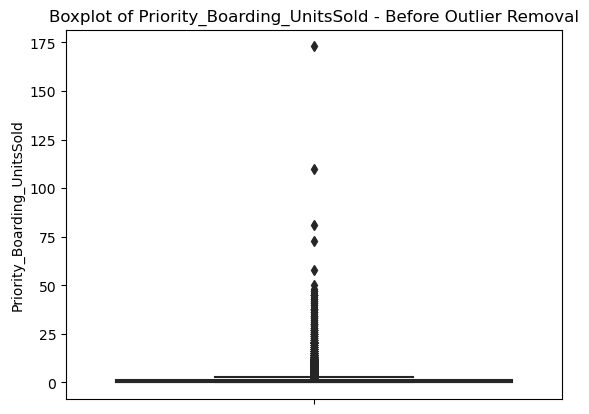

In [42]:
# Boxplot of Priority_Boarding_UnitsSold

sns.boxplot(y = 'Priority_Boarding_UnitsSold', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of Priority_Boarding_UnitsSold - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('Priority_Boarding_UnitsSold');

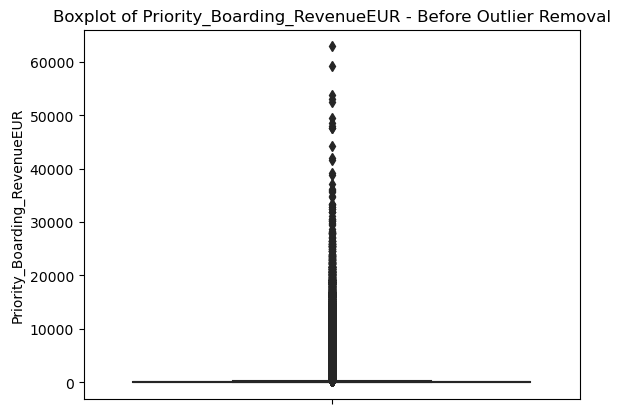

In [43]:
# Boxplot of Priority_Boarding_RevenueEUR

sns.boxplot(y = 'Priority_Boarding_RevenueEUR', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of Priority_Boarding_RevenueEUR - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('Priority_Boarding_RevenueEUR');

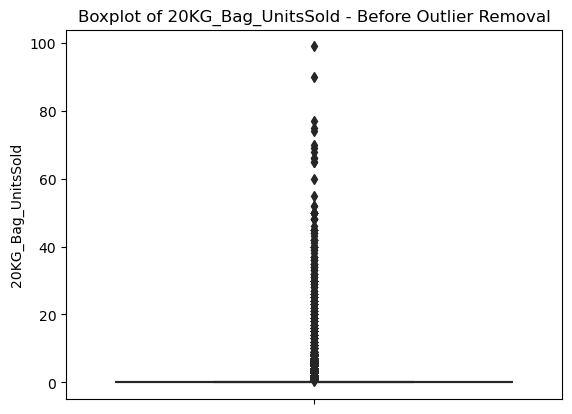

In [44]:
# Boxplot of 20KG_Bag_UnitsSold

sns.boxplot(y = '20KG_Bag_UnitsSold', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of 20KG_Bag_UnitsSold - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('20KG_Bag_UnitsSold');

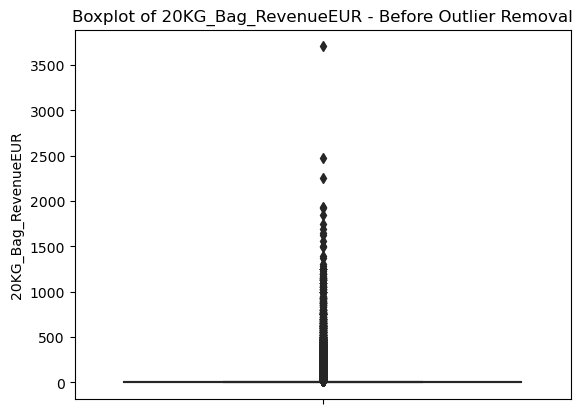

In [45]:
# Boxplot of 20KG_Bag_RevenueEUR

sns.boxplot(y = '20KG_Bag_RevenueEUR', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of 20KG_Bag_RevenueEUR - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('20KG_Bag_RevenueEUR');

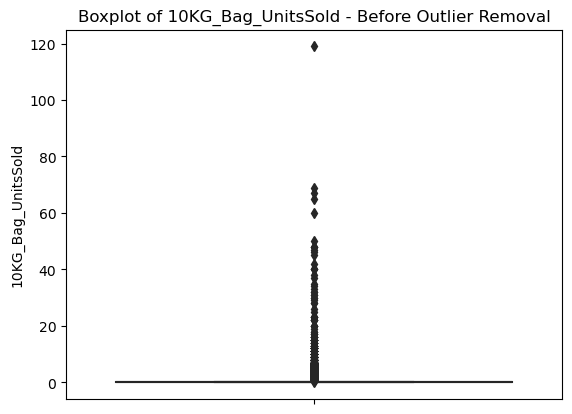

In [46]:
# Boxplot of 10KG_Bag_UnitsSold

sns.boxplot(y = '10KG_Bag_UnitsSold', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of 10KG_Bag_UnitsSold - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('10KG_Bag_UnitsSold');

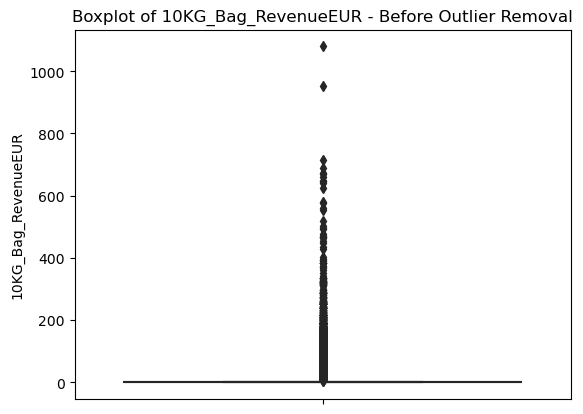

In [47]:
# Boxplot of 10KG_Bag_RevenueEUR

sns.boxplot(y = '10KG_Bag_RevenueEUR', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of 10KG_Bag_RevenueEUR - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('10KG_Bag_RevenueEUR');

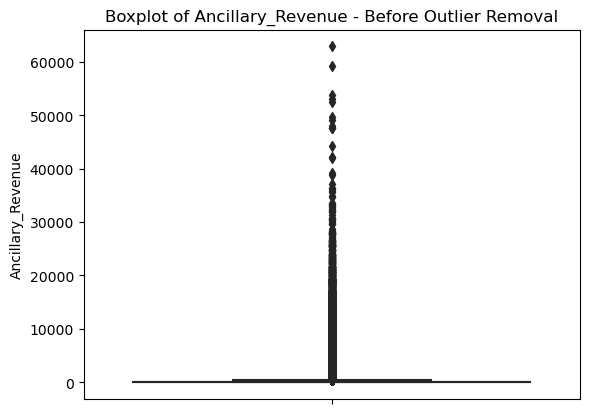

In [48]:
# Boxplot of Ancillary_Revenue

sns.boxplot(y = 'Ancillary_Revenue', data = ancillary_revenue, color = 'teal')
plt.title('Boxplot of Ancillary_Revenue - Before Outlier Removal');
plt.xlabel('');
plt.ylabel('Ancillary_Revenue');

In [49]:
# Removal of outliers using Inter Quartile Range (IQR):

columns = ['Passenger_UnitsSold',	'Priority_Boarding_UnitsSold', 'Priority_Boarding_RevenueEUR',	'20KG_Bag_UnitsSold',	'20KG_Bag_RevenueEUR',	'10KG_Bag_UnitsSold',	'10KG_Bag_RevenueEUR',	'Ancillary_Revenue']

Q3 = ancillary_revenue[columns].quantile(.75)
Q1 = ancillary_revenue[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

for column in columns:
  ancillary_revenue[column] = np.where(ancillary_revenue[column] > UL[column], UL[column], np.where(ancillary_revenue[column] < LL[column], LL[column], ancillary_revenue[column]))

### Encoding Using Label Encoder

In [51]:
columns = ['CarrierCode', 'DepartureAirport', 'ArrivalAirport', 'ArrivalCountry',
           'DepartureCountry', 'RouteGroup', 'Region',
           'DepartureDateTimeLocal',	'DepartureDateTimeUTC',	'ArrivalDateTimeLocal',
           'ArrivalDateTimeUTC']

# Combine the categorical data from both datasets
combined_data = pd.concat([ancillary_revenue[columns], validation_data[columns]])

# Setting up LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns in both datasets
encoders = {}
for col in columns:
    encoder = LabelEncoder()
    encoder.fit(combined_data[col])
    ancillary_revenue[col] = encoder.transform(ancillary_revenue[col])
    validation_data[col] = encoder.transform(validation_data[col])
    encoders[col] = encoder  # Store the encoder for later use

In [52]:
ancillary_revenue.drop(['FlightStatus', 'PurchaseDateSK'], axis = 1, inplace = True)

# Model Selection and Training

### Data Splitting

In [55]:
# Ensuring both datasets have the same columns
common_columns = [col for col in ancillary_revenue.columns if col in validation_data.columns and col != 'Ancillary_Revenue']

# Data splitting
x = ancillary_revenue[common_columns]
y = ancillary_revenue['Ancillary_Revenue']

### Model: Decision Tree

In [57]:
# Finding best hyperparameters for decision tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [3, 5],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [20, 40]
}

dt = DecisionTreeRegressor()

# Perform grid search
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs = -1)
grid_search.fit(x, y)

# Best parameters
best_params = grid_search.best_params_
print('Best hyperparameters = ', best_params)

Best hyperparameters =  {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 40}


In [58]:
# Using suggested parameters in decision tree

dt = DecisionTreeRegressor(criterion = 'friedman_mse',
                            max_depth = 5,
                            min_samples_leaf = 20,
                            min_samples_split = 40)

dt.fit(x, y)

# Predict on the validation_data
validation_data_scaled = validation_data[common_columns]
y_pred_validation = dt.predict(validation_data_scaled)

validation_data['Predicted_Ancillary_Revenue'] = y_pred_validation

In [59]:
# Revert numerical to original categorical values for interpretability

for col in columns:
    if col in validation_data.columns:
        encoder = encoders[col]
        validation_data[col] = encoder.inverse_transform(validation_data[col])

In [60]:
validation_data.sample(5)

,InventoryLegSK,CarrierCode,FlightNumber,DepartureAirport,ArrivalAirport,DepartureDateTimeLocal,DepartureDateTimeUTC,ArrivalDateTimeLocal,ArrivalDateTimeUTC,ArrivalCountry,DepartureCountry,RouteGroup,Region,FlightCapacity,Predicted_Ancillary_Revenue
1351,9750159,FR,8726,BRI,CAG,2023-05-27 16:40:00,2023-05-27 15:40:00,2023-05-27 20:10:00,2023-05-27 18:10:00,Italy,Italy,DOMESTIC,IT DOM,189,69.929474
1693,10104437,FR,6826,EDI,FAO,2023-09-23 17:05:00,2023-09-23 16:05:00,2023-09-23 21:05:00,2023-09-23 19:05:00,Portugal,United Kingdom,LEISURE,SCOT LEISURE,189,105.556137
273,9025570,FR,6874,BCN,DUB,2023-08-25 18:10:00,2023-08-25 17:10:00,2023-08-25 21:30:00,2023-08-25 19:30:00,Ireland,Spain,CITY,IE CITY,197,69.929474
1657,9886693,RK,3836,MAN,MAH,2023-09-24 06:40:00,2023-09-24 05:40:00,2023-09-24 10:20:00,2023-09-24 08:20:00,Spain,United Kingdom,LEISURE,UK REG LEISURE,189,105.556137
440,9101523,FR,7896,TLV,VIE,2023-09-06 17:20:00,2023-09-06 16:20:00,2023-09-06 21:00:00,2023-09-06 19:00:00,Austria,Israel,LEISURE,CE EUR LEISURE,180,83.087791


In [61]:
# Checking validation_data to ensure export is correct

validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   InventoryLegSK               1924 non-null   int64         
 1   CarrierCode                  1924 non-null   object        
 2   FlightNumber                 1924 non-null   int64         
 3   DepartureAirport             1924 non-null   object        
 4   ArrivalAirport               1924 non-null   object        
 5   DepartureDateTimeLocal       1924 non-null   datetime64[ns]
 6   DepartureDateTimeUTC         1924 non-null   datetime64[ns]
 7   ArrivalDateTimeLocal         1924 non-null   datetime64[ns]
 8   ArrivalDateTimeUTC           1924 non-null   datetime64[ns]
 9   ArrivalCountry               1924 non-null   object        
 10  DepartureCountry             1924 non-null   object        
 11  RouteGroup                   1924 non-null 

In [62]:
file_path = r'C:\Users\prita\OneDrive\Documents\Ancillary Revenue Prediction\data\validation_data.xlsx'

# Export validation_data to Excel
validation_data.to_excel(file_path, index = False)

In [63]:
print("We started this assignment by importing the three datasets given: i) flight data, ii) sales data, and iii) validation data. The task was to predict the ancillary revenue for the flight details given in the validation dataset using features from the other two. We merged the flight and sales datasets into an 'ancillary_revenue' dataframe to match flight details with their respective sales figures for ancillary sales. Using selected sales features, we created the 'ancillary_sales' column to predict for the validation dataset. Our exploratory data analysis involved changing data types, cleaning data, and exploring all features for both train and validation sets. Using LabelEncoder, we transformed categorical and datetime data into numerical formats to ensure compatibility with models during prediction. We split the features and opted to employ Decision Tree Regressor. Importantly, we retained most features rather than dropping them to align 'ancillary_revenue' with the validation set. Training utilized the entire 'ancillary_revenue' dataset for validation. To determine optimal Decision Tree parameters, GridSearchCV was employed. Finally, we transformed numerical data back to its original form.")


We started this assignment by importing the three datasets given: i) flight data, ii) sales data, and iii) validation data. The task was to predict the ancillary revenue for the flight details given in the validation dataset using features from the other two. We merged the flight and sales datasets into an 'ancillary_revenue' dataframe to match flight details with their respective sales figures for ancillary sales. Using selected sales features, we created the 'ancillary_sales' column to predict for the validation dataset. Our exploratory data analysis involved changing data types, cleaning data, and exploring all features for both train and validation sets. Using LabelEncoder, we transformed categorical and datetime data into numerical formats to ensure compatibility with models during prediction. We split the features and opted to employ Decision Tree Regressor. Importantly, we retained most features rather than dropping them to align 'ancillary_revenue' with the validation set. Trai